# Jakarta Air Quality Analysis (2010–2025)

This notebook explores air quality trends in Jakarta, Indonesia using data from *Satu Data Jakarta*.  
It focuses on six key pollutants: **PM2.5, PM10, SO₂, CO, O₃, and NO₂**, analyzing their temporal patterns and relationships.

---

### Objectives:
- Explore air quality trends across years and months.
- Identify major pollutants contributing to poor air quality.
- Visualize pollution patterns using Matplotlib and Seaborn.
- Prepare insights for potential policy implications.


In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Plot settings
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (10, 5)
sns.set_palette('viridis')

## Load and Preview the Dataset

We start by importing the dataset `jakarta_air_quality_all.csv`, which combines daily air quality index (AQI) data from multiple Jakarta monitoring stations.


In [2]:
# Load dataset
df = pd.read_csv('jakarta_air_quality_all.csv')

# Display top 5 rows
df.head()

,tanggal,stasiun,pm25,pm10,so2,co,o3,no2,max,critical,categori
0,2010-01-01,DKI1 (Bunderan HI),NaN,60.0,4.0,73.0,27.0,14.0,73.0,CO,SEDANG
1,2010-01-02,DKI1 (Bunderan HI),NaN,32.0,2.0,16.0,33.0,9.0,33.0,O3,BAIK
2,2010-01-03,DKI1 (Bunderan HI),NaN,27.0,2.0,19.0,20.0,9.0,27.0,PM10,BAIK
3,2010-01-04,DKI1 (Bunderan HI),NaN,22.0,2.0,16.0,15.0,6.0,22.0,PM10,BAIK
4,2010-01-05,DKI1 (Bunderan HI),NaN,25.0,2.0,17.0,15.0,8.0,25.0,PM10,BAIK


### Notes:
- The dataset contains **daily** (or monthly averaged) air quality data.
- Columns include:
  - `tanggal` - Date of observation  
  - `stasiun` - Monitoring station name  
  - `pm25`, `pm10`, `so2`, `co`, `o3`, `no2` - Pollutant concentrations  
  - `max` - Maximum pollutant value of the day  
  - `critical` - Dominant pollutant that day  
  - `categori` - Air quality category (BAIK, SEDANG, etc.)


## Data Cleaning & Preparation

To ensure accurate analysis, we:
1. Check for missing values and data types.
2. Convert the `tanggal` column to proper `datetime` format.
3. Remove rows with missing dates or pollutant values.


In [3]:
# Check missing values and data info
df.info()
df.isna().sum()

# Convert date column to datetime
df['tanggal'] = pd.to_datetime(df['tanggal'], errors='coerce')

# Drop rows with missing date and NaN
df = df.dropna(subset=['tanggal'])
df = df.dropna(subset=['pm25'])

# Sort by date
df = df.sort_values('tanggal')

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5538 entries, 0 to 5537
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tanggal   5538 non-null   object 
 1   stasiun   5537 non-null   object 
 2   pm25      1516 non-null   float64
 3   pm10      5223 non-null   float64
 4   so2       5408 non-null   float64
 5   co        5450 non-null   float64
 6   o3        5434 non-null   float64
 7   no2       5432 non-null   float64
 8   max       5537 non-null   float64
 9   critical  5534 non-null   object 
 10  categori  5538 non-null   object 
dtypes: float64(7), object(4)
memory usage: 476.1+ KB


,tanggal,stasiun,pm25,pm10,so2,co,o3,no2,max,critical,categori
4018,2021-01-01,DKI2 (Kelapa Gading),58.0,38.0,2.0,11.0,65.0,6.0,65.0,O3,SEDANG
4019,2021-01-02,DKI3 (Jagakarsa),86.0,58.0,15.0,22.0,38.0,5.0,86.0,PM25,SEDANG
4020,2021-01-03,DKI3 (Jagakarsa),93.0,64.0,14.0,20.0,35.0,5.0,93.0,PM25,SEDANG
4021,2021-01-04,DKI2 (Kelapa Gading),49.0,30.0,NaN,9.0,77.0,7.0,77.0,O3,SEDANG
4022,2021-01-05,DKI3 (Jagakarsa),89.0,59.0,15.0,19.0,42.0,7.0,89.0,PM25,SEDANG


## Exploratory Data Analysis

Now that the dataset is clean, we can visualize pollution trends to better understand temporal and pollutant-specific patterns in Jakarta’s air quality.


In [4]:
# Check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1516 entries, 4018 to 5537
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   tanggal   1516 non-null   datetime64[ns]
 1   stasiun   1515 non-null   object        
 2   pm25      1516 non-null   float64       
 3   pm10      1317 non-null   float64       
 4   so2       1495 non-null   float64       
 5   co        1495 non-null   float64       
 6   o3        1494 non-null   float64       
 7   no2       1503 non-null   float64       
 8   max       1516 non-null   float64       
 9   critical  1516 non-null   object        
 10  categori  1516 non-null   object        
dtypes: datetime64[ns](1), float64(7), object(3)
memory usage: 142.1+ KB


## Statistical Summary and Monthly Aggregation

In this section, we summarize the overall pollutant levels and prepare the data for time-based analysis.

### Summary Statistics
We begin by generating descriptive statistics for all numeric columns to understand the overall distribution of pollutant concentrations.

Next, we calculate the **average levels** of key pollutants - `PM2.5`, `PM10`, `SO₂`, `CO`, `O₃`, and `NO₂` - and sort them to identify which pollutants generally dominate Jakarta’s air quality.

> **Insight:** This step gives a quick overview of the pollution hierarchy - helping identify which pollutant contributes the most to poor air quality.


In [5]:
# Summary statistics of numeric columns
df.describe()

# Average pollutant levels
df[['pm25', 'pm10', 'so2', 'co', 'o3', 'no2']].mean().sort_values(ascending=False)

pm25    89.742084
pm10    56.164009
so2     40.036120
o3      34.595047
no2     22.205589
co      16.098997
dtype: float64

### Create Year and Month Columns
We extract **year** and **month** from the `tanggal` column to simplify time-series analysis and visualization.

Then, we group the data by `year` and `month` to calculate the **mean concentration** of each pollutant for every month.

This allows us to visualize monthly pollution trends over time, such as seasonal patterns or yearly improvements/declines in air quality.

In [6]:
# Create new columns for year and month
df['year'] = df['tanggal'].dt.year
df['month'] = df['tanggal'].dt.month

# Group by month (mean of pollutants)
monthly_df = df.groupby(['year', 'month'])[['pm25', 'pm10', 'co', 'no2']].mean().reset_index()
monthly_df.head()

,year,month,pm25,pm10,co,no2
0,2021,1,65.612903,44.400000,14.709677,8.967742
1,2021,2,68.678571,44.392857,12.360000,13.750000
2,2021,3,87.935484,55.161290,13.935484,16.774194
3,2021,4,91.866667,60.000000,13.586207,19.833333
4,2021,5,90.741935,57.366667,11.481481,17.548387


## Visual 1 – Monthly PM2.5 Trend in Jakarta

In this section, we visualize how **PM2.5 concentrations** have changed in Jakarta from **2010 to 2025** 

PM2.5 is one of the most harmful air pollutants because its fine particles can penetrate deep into the lungs and bloodstream.  
Tracking its monthly trend helps us identify: 

- Periods of high pollution levels (spikes).  
- Seasonal variations in air quality.  
- Overall improvement or deterioration over time.

The chart below shows PM2.5 concentration (`µg/m³`) across the years, plotted as a continuous line for better visibility of long-term fluctuations.

> **Insight:** The trend highlights recurring peaks that may correspond to seasonal changes, increased vehicle emissions, or regional fire events.


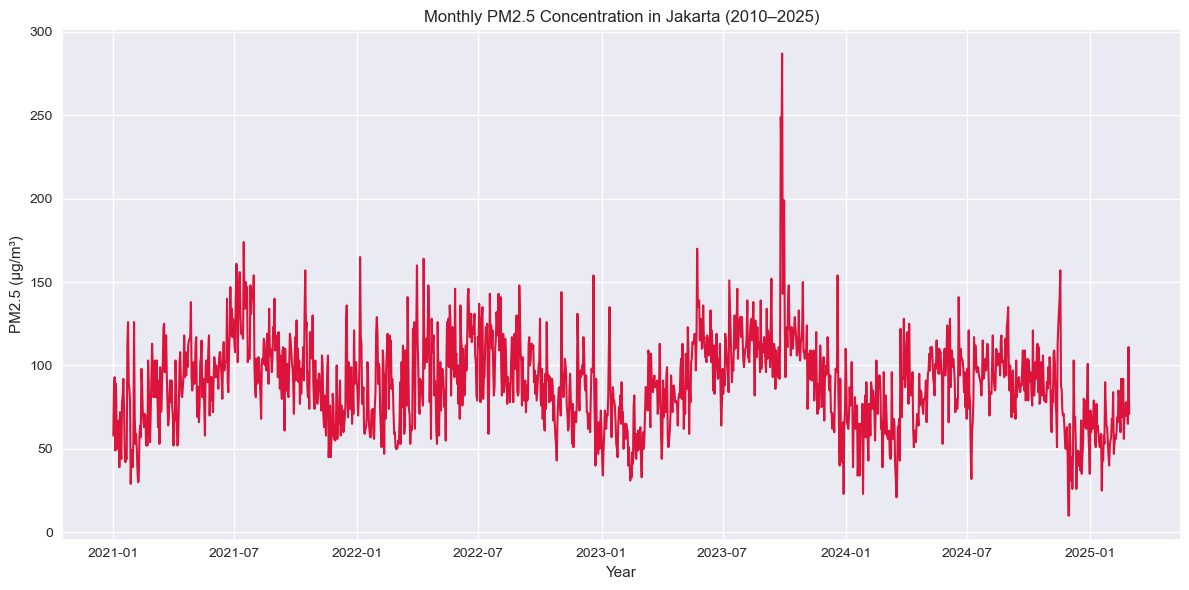

In [ ]:
# Visual 1 – Monthly PM2.5 Trend
plt.figure(figsize=(12,6))
plt.plot(df['tanggal'], df['pm25'], color='crimson', linewidth=1.5)
plt.title('Monthly PM2.5 Concentration in Jakarta')
plt.xlabel('Year')
plt.ylabel('PM2.5 (µg/m³)')
plt.grid(True)
plt.tight_layout()

import os
os.makedirs('Project_data/visuals', exist_ok=True)

# Save the plot
plt.savefig('Project_data/visuals/monthly_trends.png', dpi=300)
plt.show()

> ### Insight
> From the plot, we can observe noticeable **fluctuations in PM2.5 levels** between 2021 and 2025.  
> 
> - There are **recurring peaks** around mid-year periods, likely corresponding to **dry seasons** when air pollution tends to intensify due to less rainfall and stagnant air.  
> - A **major spike** is visible in **mid-2023**, which could indicate regional haze or an unusual pollution event.  
> - While PM2.5 levels appear to **decline slightly toward early 2025**, the concentration remains **well above the WHO safety limit (15 µg/m³)**, signaling persistent air quality challenges in Jakarta.  
> 
> Overall, the trend suggests that **Jakarta experiences cyclical pollution patterns**, driven by **seasonal changes and anthropogenic activities** such as traffic and industrial emissions.


## Visual 2 – Comparison of Pollutant Levels in Jakarta

In this section, we compare the concentration trends of major air pollutants measured in Jakarta, including **PM2.5, PM10, SO₂, CO, O₃, and NO₂**, over the study period.

Each pollutant has a different source and environmental impact:
- **PM2.5 and PM10** originate primarily from vehicle emissions, industrial activities, and construction dust.
- **SO₂** is mainly released from fuel combustion and industrial processes.
- **CO** is produced from incomplete combustion of fossil fuels.
- **O₃ (ozone)** forms through photochemical reactions involving nitrogen oxides and volatile organic compounds.
- **NO₂** largely comes from traffic and power generation.

This visualization enables a comparative understanding of pollutant behavior, revealing which compounds contribute most significantly to Jakarta’s air pollution burden.



In [11]:
# Convert 'tanggal' column to datetime
df['tanggal'] = pd.to_datetime(df['tanggal'], errors='coerce')

# Set 'tanggal' as index
df.set_index('tanggal', inplace=True)

# Sort the index just in case
df = df.sort_index()

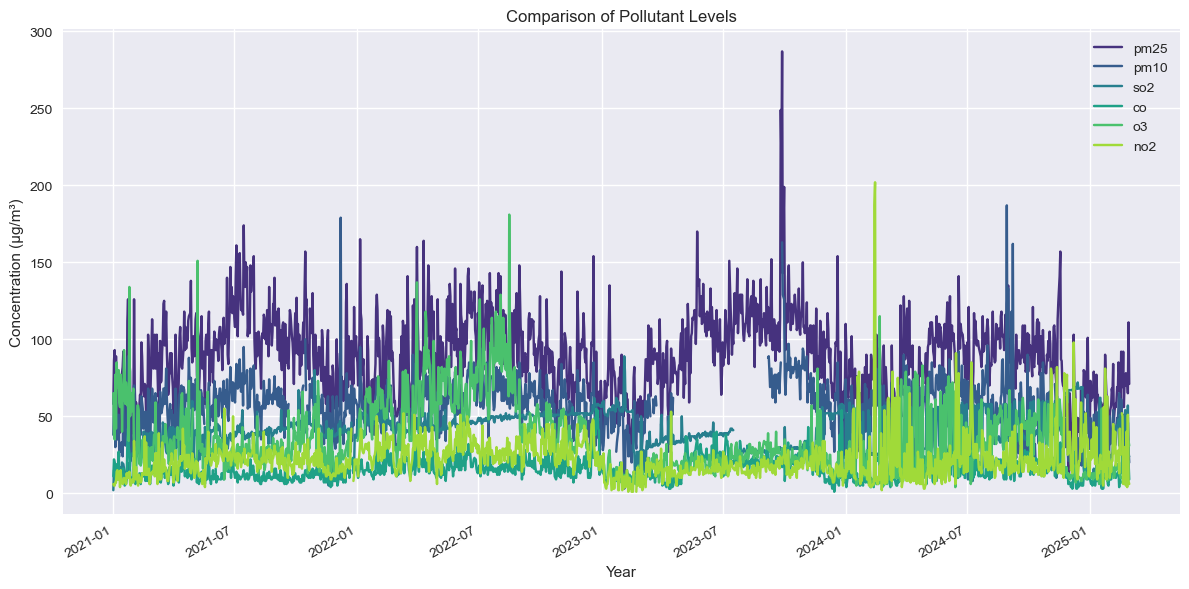

In [12]:
# Visual 2 - Comparisson of Pollutant Levels 
pollutants = ['pm25', 'pm10', 'so2', 'co', 'o3', 'no2']
df[pollutants].plot(figsize=(12,6))
plt.title('Comparison of Pollutant Levels')
plt.ylabel('Concentration (µg/m³)')
plt.xlabel('Year')
plt.legend()
plt.tight_layout()
plt.savefig('project_data/visuals/pollutant_comparison.png', dpi=300)
plt.show()




## Visual 3 – Individual Pollutant Trends in Jakarta

In this section, we visualize the **temporal evolution of each air pollutant** individually to better understand their unique trends and fluctuations over time.

While the previous visual (Visual 2) provided an overview comparison, this breakdown allows for **clearer observation of each pollutant’s behavior**, seasonal pattern, and potential emission sources.  
The pollutants analyzed include **PM2.5, PM10, SO₂, CO, O₃, and NO₂**, plotted across two rows and three columns for comparative readability.

This visualization helps to:
- Identify **distinct patterns or spikes** in specific pollutants.  
- Observe **differences in pollutant variability** and long-term behavior.  
- Assess whether certain pollutants exhibit **seasonal or yearly fluctuations** more strongly than others.

The following subplots present these pollutants individually to highlight **their distinct dynamics and potential environmental implications**.


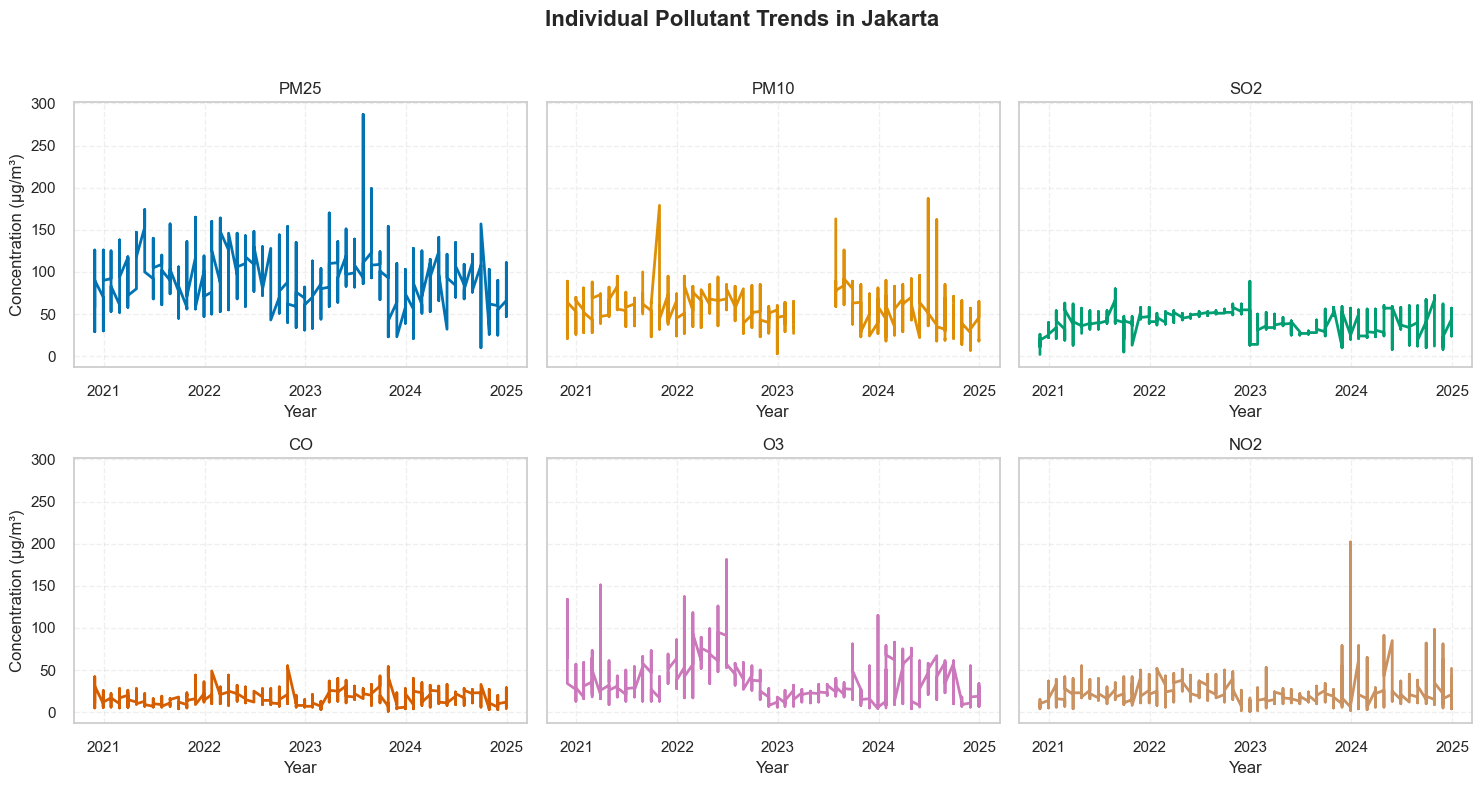

In [ ]:
pollutants = ['pm25', 'pm10', 'so2', 'co', 'o3', 'no2']

df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str) + '-01')
df = df.sort_values('date')

sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(2, 3, figsize=(15, 8), sharey=True)

for ax, pollutant in zip(axes.flat, pollutants):
    ax.plot(df['date'], df[pollutant],
            color=sns.color_palette("colorblind")[pollutants.index(pollutant)],
            linewidth=2)
    ax.set_title(pollutant.upper(), fontsize=12)
    ax.set_xlabel("Year")
    import matplotlib.dates as mdates
    # Format x-axis ticks to show year only
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.xaxis.set_major_locator(mdates.YearLocator(1,2,3))

    ax.grid(True, linestyle="--", alpha=0.3)

for row in range(2):  
    axes[row, 0].set_ylabel("Concentration (µg/m³)")

fig.suptitle("Individual Pollutant Trends in Jakarta", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('project_data/visuals/pollutant_subplots.png', dpi=300)
plt.show()


### Insight

The comparison of pollutant levels across time reveals several key patterns in Jakarta’s air quality:

1. **Particulate Matter Dominance:**  
   Both **PM2.5** and **PM10** consistently register the highest concentrations among all measured pollutants, often exceeding 100 µg/m³. This confirms that **particulate emissions remain the primary air quality concern** in Jakarta, largely driven by traffic, industrial combustion, and construction activities.

2. **Seasonal and Episodic Spikes:**  
   Distinct spikes, particularly in PM concentrations, are visible throughout multiple years. These may correspond to **dry-season conditions, temperature inversions, or regional haze episodes** (such as biomass burning or transboundary pollution).

3. **Relatively Stable Gaseous Pollutants:**  
   Pollutants like **CO, SO₂, and NO₂** exhibit relatively moderate and stable concentration levels, suggesting **effective control from industrial and vehicular emissions** or faster atmospheric dispersion.

4. **Ozone (O₃) Behavior:**  
   **O₃ levels fluctuate inversely with NO₂**, which aligns with **photochemical smog dynamics**, where sunlight converts NO₂ and volatile organic compounds (VOCs) into ozone. This indicates that **Jakarta’s ozone formation is photochemically active**, especially during sunny, low-rainfall months.

5. **Overall Air Quality Implication:**  
   The sustained high levels of PM pollutants imply **a persistent health risk** for residents and highlight the need for targeted mitigation—particularly in **transportation management, industrial regulation, and dust control policies**.

> **Summary:** PM2.5 and PM10 dominate Jakarta’s air pollution profile, while gaseous pollutants show more moderate and cyclical variation. The findings emphasize the critical role of particulate control in improving the city’s long-term air quality.
